            latitude      longitude
count  369709.000000  369709.000000
mean       39.526128     -91.823315
std         4.889232      13.038724
min         1.980000    -171.720000
25%        37.300000     -97.280000
50%        40.090000     -89.760000
75%        42.630000     -84.000000
max        75.000000      73.410000


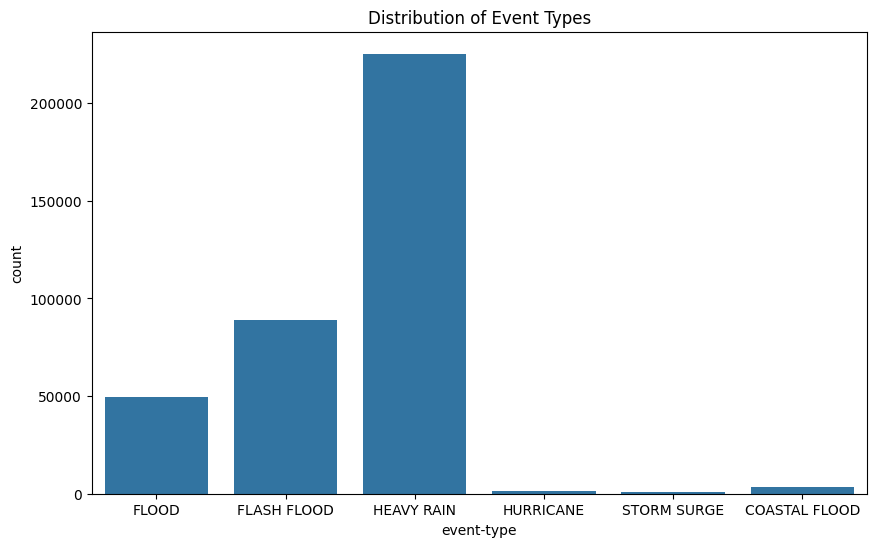

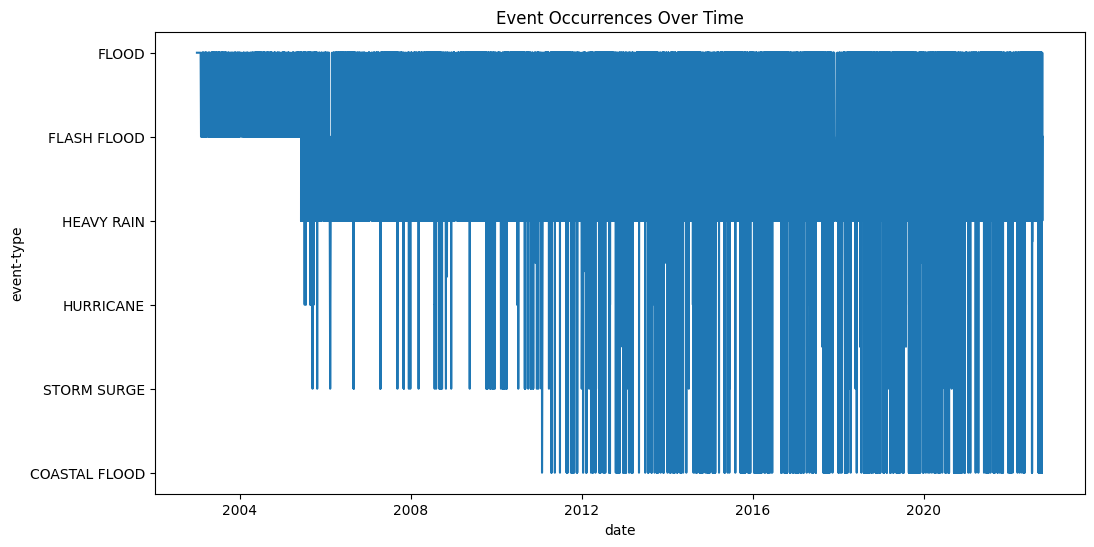

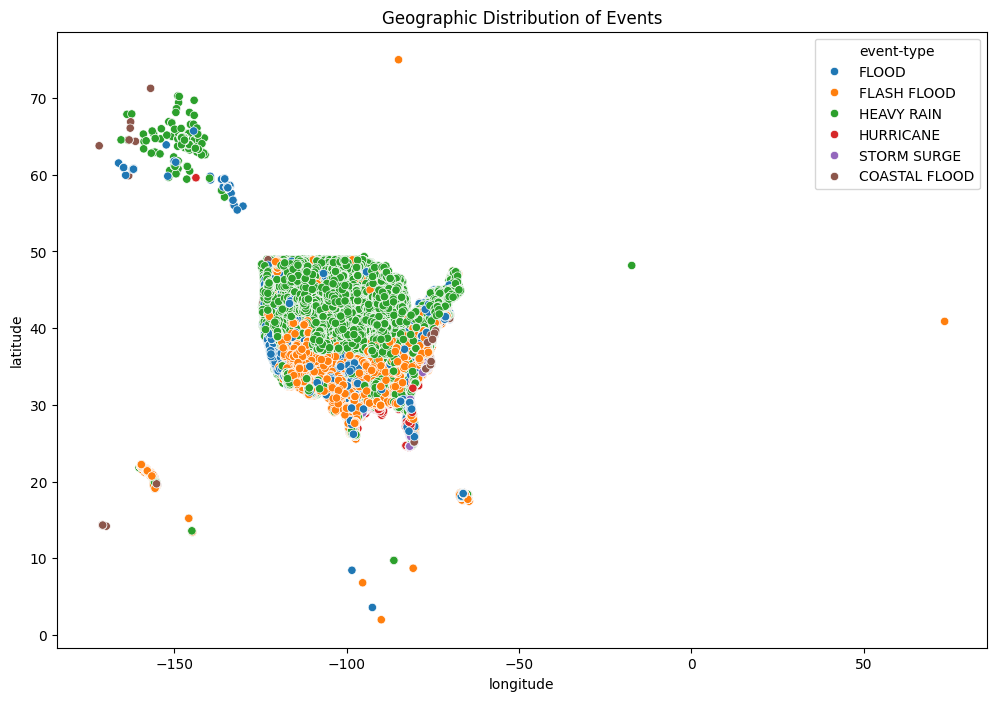

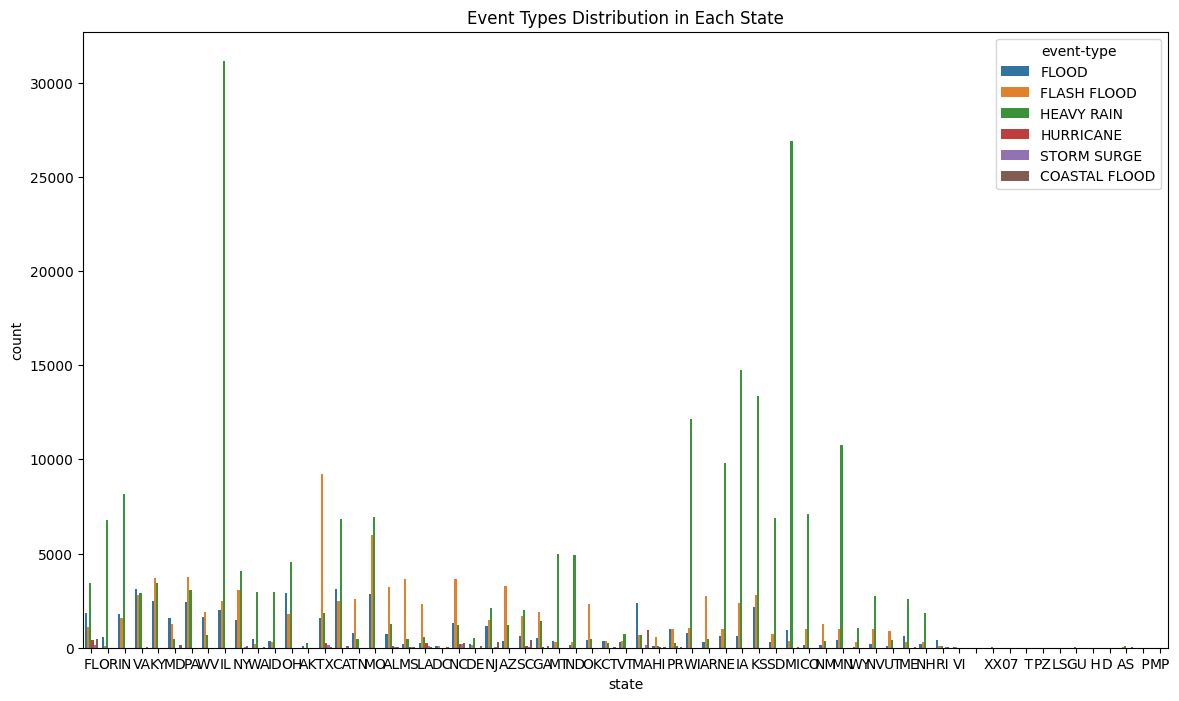

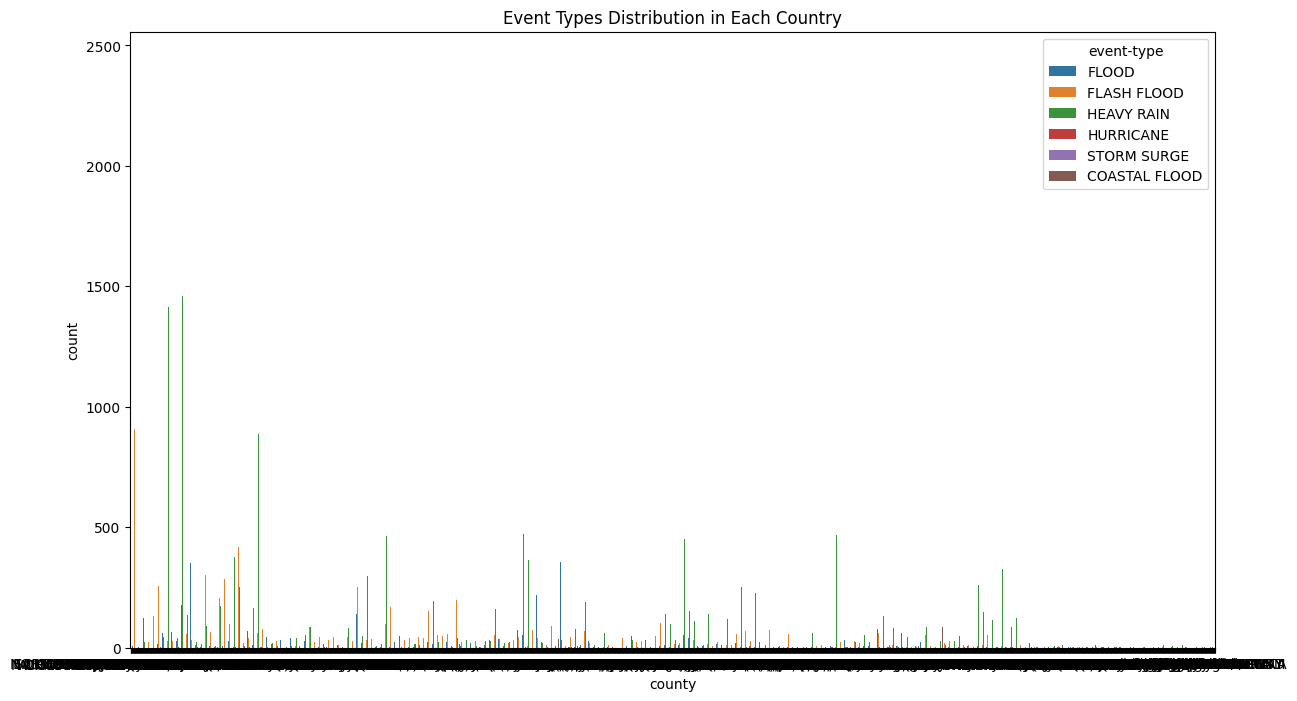

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uploaded the provided csv on Git to use it from our code as the NoteBook deletes csv after runtime
# Using pandas to read csv from the Git raw file link
df = pd.read_csv('https://raw.githubusercontent.com/krisnaprem08/Weather-CyberBoxer/main/events.csv')

# Checking if there are any empty values in the csv
# df.isnull().sum()

# Dropping the rows with missing values in order to neutralize errors from the visualizations
df = df.dropna()

# Changing the date string into date and time object to use it for visualizations
df['date'] = pd.to_datetime(df['date'])

# Describing the DataFrame to provide basic information about the dataset
print(df.describe())

# Setting the figure size accoring to the size of dataset
plt.figure(figsize=(10, 6))
# Using countplot to show the count of all the event types provided
sns.countplot(x='event-type', data=df)
# Setting the title of the figure
plt.title('Distribution of Event Types')
# Priting the figure in the output
plt.show()

plt.figure(figsize=(12, 6))
# Using line plot to compare with date and event types of the dataset
sns.lineplot(x='date', y='event-type', data=df, errorbar=None)
plt.title('Event Occurrences Over Time')
plt.show()

plt.figure(figsize=(12, 8))
# Using scatter plot to show the distribution of all the coordinates
sns.scatterplot(x='longitude', y='latitude', hue='event-type', data=df)
plt.title('Geographic Distribution of Events')
plt.show()

# Plotting more sub figures like event type in each stare/country

plt.figure(figsize=(14, 8))
sns.countplot(x='state', hue='event-type', data=df)
plt.title('Event Types Distribution in Each State')
plt.show()

plt.figure(figsize=(14, 8))
# Country is misspelled as 'county' in the csv
sns.countplot(x='county', hue='event-type', data=df)
plt.title('Event Types Distribution in Each Country')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


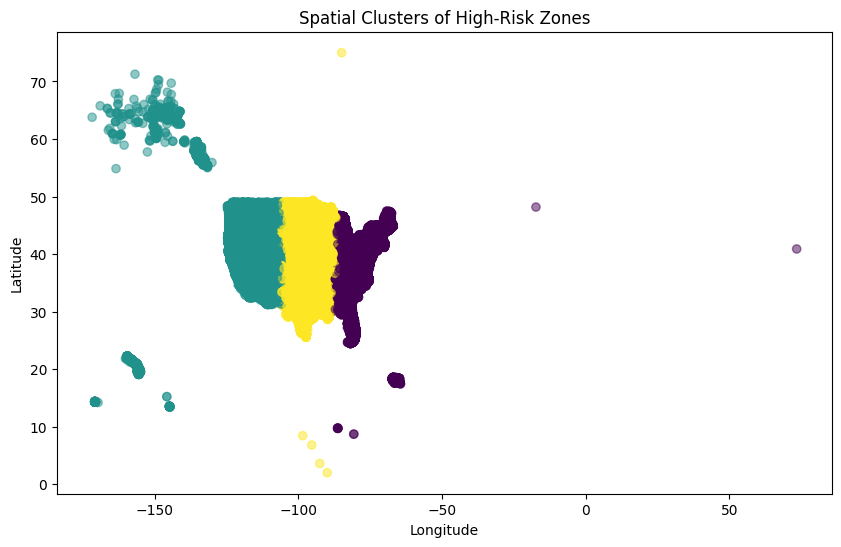

In [ ]:
# Using KMeans to provide the HighRiskZones from the dataset
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/krisnaprem08/Weather-CyberBoxer/main/events.csv')

# Storing latitude and longitude columns of the csv in a variable
data_for_clustering = df[['latitude', 'longitude']]

# Settings the number of cluster groups in the figure
num_clusters = 3

# Storing the kmeans in a variable
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# Storing the predicted values in new coloumn named as 'cluster'
df['cluster'] = kmeans.fit_predict(data_for_clustering)

plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Spatial Clusters of High-Risk Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Grouping by cluster and resetting the index
cluster_stats = df.groupby('cluster').size().reset_index(name='count')
# Adding new values of severity and storing the count of the clusters
cluster_stats['severity'] = pd.qcut(cluster_stats['count'], q=[0, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High'])

# Merging the cluster and severity values
df = df.merge(cluster_stats[['cluster', 'severity']], on='cluster')

# Storing the csv with newly added columns and values
df.to_csv('HighRiskZones.csv', index=False)


In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/krisnaprem08/Weather-CyberBoxer/main/events.csv')

df['date'] = pd.to_datetime(df['date'])

# Getting only the year from the date string and storing in a seperate column
df['year'] = df['date'].dt.year

yearly_event_counts = df.groupby(['year', 'event-type']).size().reset_index(name='count')

# Getting the max of the count in each event type
most_affected_years = yearly_event_counts.loc[yearly_event_counts.groupby('event-type')['count'].idxmax()]

most_affected_years.to_csv('most_affected_years.csv', index=False)

print(most_affected_years)


    year     event-type  count
72  2018  COASTAL FLOOD    570
91  2021    FLASH FLOOD   6305
74  2018          FLOOD   5424
81  2019     HEAVY RAIN  23938
88  2020      HURRICANE    303
89  2020    STORM SURGE    162


In [ ]:
# Using geopy to calculate distance between coordinates
import pandas as pd
from geopy.distance import geodesic

df = pd.read_csv('https://raw.githubusercontent.com/krisnaprem08/Weather-CyberBoxer/main/events.csv')

# ENTER LATITUDE AND LONGITUDE
target_latitude = 27.10
target_longitude = -81.14
target_point = (target_latitude, target_longitude)

def calculate_distance(row):
    # Storing the latitute and longitude of the particular row in a variable
    event_coordinates = (row['latitude'], row['longitude'])
    # Calucating the distance between the target point entered and the row values in kilometers
    return geodesic(target_point, event_coordinates).kilometers

# Adding new column and storing the distance from the starget point to the row values
df['distance_to_target'] = df.apply(calculate_distance, axis=1)

# Storing in a variable if the distance is less than or equal to 50
events_within_50km = df[df['distance_to_target'] <= 50]

total_events_within_50km = events_within_50km.shape[0]

events_within_50km.to_csv('events_within_50km.csv', index=False)

print(f"Total events within 50 km of the target point: {total_events_within_50km}")


Total events within 50 km of the target point: 48
